In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
df_expenses=pd.read_csv("Expense.csv")
df_expenses.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K


In [4]:
df_expenses.shape

(5000, 14)

In [5]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [6]:
df_expenses.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.656000,10.065000,1104.080000,90.032800,40.566200
std,13.698292,2.558141,7579.674371,404.168991,12.154191
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3004.000000,99.000000


In [7]:
df_expenses['workclass'].value_counts()#?here is a variaable....,take it as missing value,can be 
#considered as a category

 Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64

In [8]:
df_expenses['workclass']

0        Self-emp-inc
1             Private
2             Private
3           State-gov
4           Local-gov
            ...      
4995          Private
4996          Private
4997          Private
4998          Private
4999          Private
Name: workclass, Length: 5000, dtype: object

In [9]:
cols=list(df_expenses.select_dtypes(include='object').columns)
for i in cols:
    print(df_expenses[i].value_counts())#
    

 Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64
 HS-grad         1602
 Some-college    1142
 Bachelors        823
 Masters          259
 Assoc-voc        214
 11th             179
 Assoc-acdm       157
 10th             156
 7th-8th          105
 Prof-school       90
 9th               84
 12th              57
 Doctorate         56
 5th-6th           46
 1st-4th           25
 Preschool          5
Name: education, dtype: int64
 Married-civ-spouse       2294
 Never-married            1643
 Divorced                  683
 Separated                 159
 Widowed                   150
 Married-spouse-absent      67
 Married-AF-spouse           4
Name: marital-status, dtype: int64
 Craft-repair         630
 Prof-specialty       619
 Exec-managerial      609
 Sales                59

In [10]:
#Here one-hot encoding,frequency and target encoding can be applied since there is no order....

In [11]:
df_expenses.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,38.6560,13.698292,17.0,28.0,37.0,48.0,90.0
education-num,5000.0,10.0650,2.558141,1.0,9.0,10.0,12.0,16.0
capital-gain,5000.0,1104.0800,7579.674371,0.0,0.0,0.0,0.0,99999.0
capital-loss,5000.0,90.0328,404.168991,0.0,0.0,0.0,0.0,3004.0
hours-per-week,5000.0,40.5662,12.154191,1.0,40.0,40.0,45.0,99.0


In [12]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from ydata_profiling import ProfileReport
report=ProfileReport(df_expenses)
report.to_file(output_file='report_expenses.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#Missing values#

In [15]:
df_expenses[df_expenses=='?']=np.nan

In [16]:
df_expenses.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

In [17]:
(df_expenses.isnull().sum()/(df_expenses.index.size)*100).sort_values(ascending=False)

age               0.0
workclass         0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
Expense           0.0
dtype: float64

In [18]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [19]:
objects=df_expenses.select_dtypes('object').columns

In [20]:
num_cols=df_expenses.select_dtypes(include=np.number)

In [21]:
num_cols.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [22]:
objects

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Expense'],
      dtype='object')

In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)

In [24]:
#Fit it on all objects

In [25]:
imputer=imputer.fit(df_expenses[objects].iloc[:,:])
df_expenses[objects]=imputer.transform(df_expenses[objects])
#Df_expenses=pd.DataFrame(df_expenses_trans,columns=df_expenses.columns)

In [26]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [27]:
num_cols.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [28]:
num_cols=num_cols[['age','hours-per-week','capital-gain','capital-loss']]

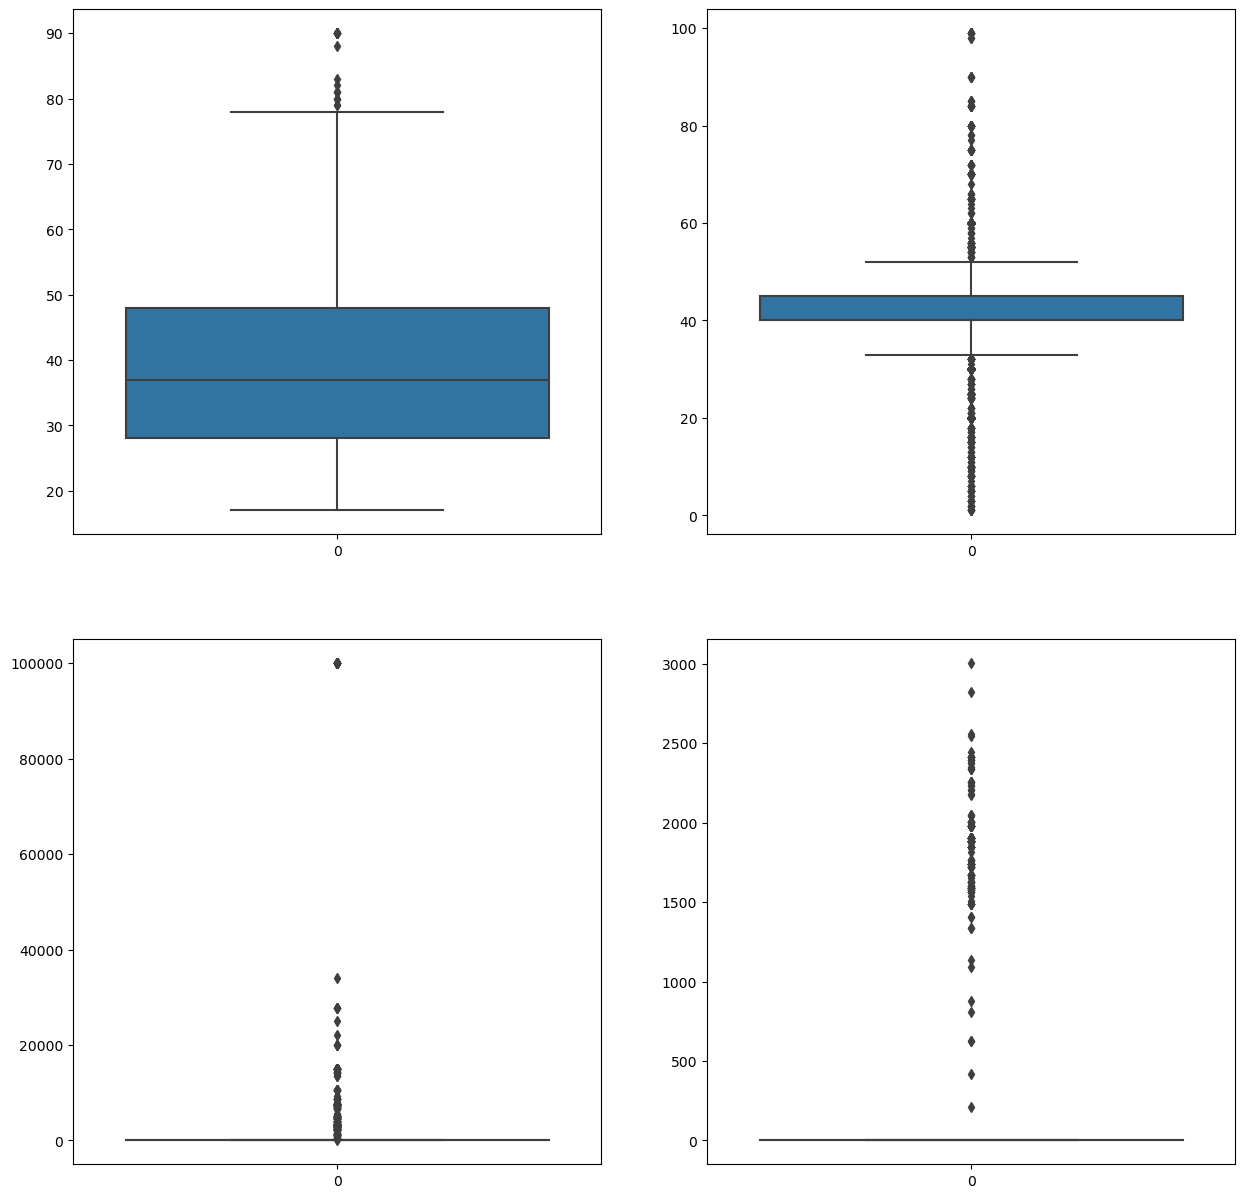

In [29]:
fig, ax=plt.subplots(2,2,figsize=(15,15))
for var, subplot in zip(num_cols.columns,ax.flatten()):
  sns.boxplot(num_cols[var],ax=subplot)

plt.show()

In [30]:
#target distributed evenly

In [31]:
df_expenses['Expense'].unique()

array([' >50K', ' <=50K'], dtype=object)

In [32]:
df_expenses['Expense']=df_expenses['Expense'].map({' <=50K':0,' >50K':1})

In [33]:
df_expenses['Expense'].value_counts(normalize=True)*100

0    75.52
1    24.48
Name: Expense, dtype: float64

In [34]:
#SMOTE wont b applied bcz we r turning fictitious data in patterns and its applied on imbalanced dataset only...

In [35]:
#Correlation Matrix for Numerical data

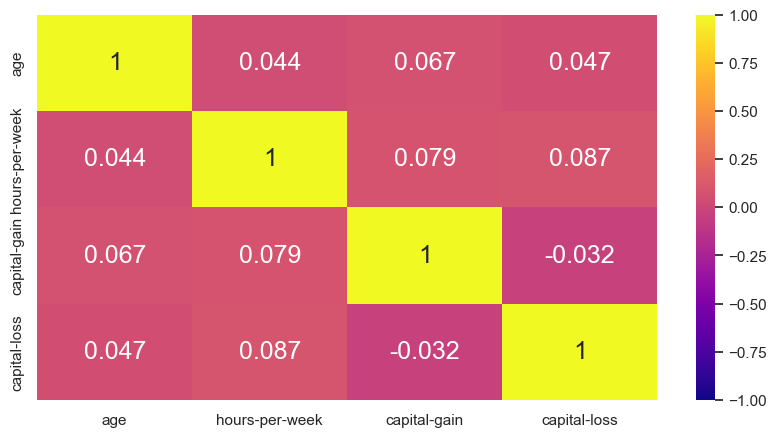

In [36]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(num_cols.corr(),
            cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot = True,
            annot_kws={"size": 18})
plt.show()


In [37]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [38]:
import category_encoders as ce


In [39]:

cols=df_expenses['workclass']
cols


0        Self-emp-inc
1             Private
2             Private
3           State-gov
4           Local-gov
            ...      
4995          Private
4996          Private
4997          Private
4998          Private
4999          Private
Name: workclass, Length: 5000, dtype: object

In [40]:
df_expenses.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,1
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,0
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,1
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,0


In [49]:
cat_columns=df_expenses.select_dtypes(object).columns

In [42]:
#Encoding of Categorical Variables

In [48]:

encoder=ce.WOEEncoder(cols=cat_columns)
encode_data=encoder.fit_transform(df_expenses[cat_columns],df_expenses['Expense'])


In [77]:
encode_data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,1.539872,0.725021,0.968321,1.037001,0.937510,0.085567,0.302285,0.020539
1,-0.103603,-0.384527,-1.902022,-1.934122,-3.146165,0.085567,0.302285,0.020539
2,-0.103603,2.367151,0.968321,0.980256,0.937510,0.085567,0.302285,0.020539
3,0.149164,-0.368765,0.968321,0.980256,1.289741,0.085567,-0.863275,0.020539
4,0.124464,0.725021,-1.902022,0.980256,-3.146165,0.085567,-0.863275,0.020539
...,...,...,...,...,...,...,...,...
4995,-0.103603,-0.368765,0.968321,-0.677132,0.937510,0.085567,0.302285,0.020539
4996,-0.103603,-0.384527,-1.902022,0.527601,-3.146165,0.085567,-0.863275,0.020539
4997,-0.103603,-1.519554,-1.902022,-0.155496,-3.146165,0.085567,0.302285,0.020539
4998,-0.103603,-0.368765,0.968321,-0.007220,0.937510,0.085567,0.302285,-1.503363


In [79]:
num_cols=df_expenses.select_dtypes(int).columns

In [80]:
num_cols

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Expense'],
      dtype='object')

In [82]:
df_salary=pd.concat([pd.DataFrame(df_expenses[num_cols]),encode_data],axis=1)
df_salary.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Expense,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,13,15024,0,50,1,1.539872,0.725021,0.968321,1.037001,0.937510,0.085567,0.302285,0.020539
1,20,10,0,0,40,0,-0.103603,-0.384527,-1.902022,-1.934122,-3.146165,0.085567,0.302285,0.020539
2,50,16,0,1902,65,1,-0.103603,2.367151,0.968321,0.980256,0.937510,0.085567,0.302285,0.020539
3,38,9,0,0,40,1,0.149164,-0.368765,0.968321,0.980256,1.289741,0.085567,-0.863275,0.020539
4,23,13,0,0,60,0,0.124464,0.725021,-1.902022,0.980256,-3.146165,0.085567,-0.863275,0.020539


In [83]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   education-num   5000 non-null   int64  
 2   capital-gain    5000 non-null   int64  
 3   capital-loss    5000 non-null   int64  
 4   hours-per-week  5000 non-null   int64  
 5   Expense         5000 non-null   int64  
 6   workclass       5000 non-null   float64
 7   education       5000 non-null   float64
 8   marital-status  5000 non-null   float64
 9   occupation      5000 non-null   float64
 10  relationship    5000 non-null   float64
 11  race            5000 non-null   float64
 12  sex             5000 non-null   float64
 13  native-country  5000 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 547.0 KB


In [110]:

Y=df_salary.Expense
X=df_salary[['age', 'education-num','sex',
               'capital-gain','capital-loss', 'hours-per-week',
               'native-country','occupation', 'workclass',
               'relationship','race', 'marital-status', 'education']]
               

In [111]:
Y

0       1
1       0
2       1
3       1
4       0
       ..
4995    0
4996    0
4997    0
4998    1
4999    0
Name: Expense, Length: 5000, dtype: int64

In [112]:
X.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,occupation,workclass,relationship,race,marital-status,education
0,39,13,0.302285,15024,0,50,0.020539,1.037001,1.539872,0.937510,0.085567,0.968321,0.725021
1,20,10,0.302285,0,0,40,0.020539,-1.934122,-0.103603,-3.146165,0.085567,-1.902022,-0.384527
2,50,16,0.302285,0,1902,65,0.020539,0.980256,-0.103603,0.937510,0.085567,0.968321,2.367151
3,38,9,-0.863275,0,0,40,0.020539,0.980256,0.149164,1.289741,0.085567,0.968321,-0.368765
4,23,13,-0.863275,0,0,60,0.020539,0.980256,0.124464,-3.146165,0.085567,-1.902022,0.725021


In [113]:
#Model building-do thge train and test split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                              Y,
                                              test_size=0.30,
                                              stratify=Y,
                                              random_state=0)

In [122]:
X_train.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,occupation,workclass,relationship,race,marital-status,education
4364,28,9,0.302285,0,0,40,0.020539,-0.007220,0.252165,-3.146165,0.085567,-1.902022,-0.368765
4851,18,6,0.302285,0,0,11,0.020539,-1.934122,-0.103603,-3.146165,0.085567,-1.902022,-1.205318
948,43,9,-0.863275,0,0,40,0.020539,-0.801241,0.149164,-1.553922,-0.756959,-1.902022,-0.368765
4486,35,6,0.302285,0,0,50,0.020539,-0.677132,-0.103603,-1.057800,0.085567,-1.113013,-1.205318
1390,36,13,0.302285,0,0,40,0.020539,-0.801241,0.124464,0.937510,0.085567,0.968321,0.725021


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [125]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [126]:
ypred_lr_train=lr.predict(X_train)
ypred_lr=lr.predict(X_test)
ypred_lr

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [130]:
print(accuracy_score(y_test,ypred_lr))
print(confusion_matrix(y_test,ypred_lr))
print(classification_report(y_test,ypred_lr))

0.838
[[1044   89]
 [ 154  213]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1133
           1       0.71      0.58      0.64       367

    accuracy                           0.84      1500
   macro avg       0.79      0.75      0.77      1500
weighted avg       0.83      0.84      0.83      1500



In [131]:
Y=df_salary.Expense
X=df_salary[['age', 'education-num','sex',
               'capital-gain','capital-loss', 'hours-per-week',
               'native-country','occupation', 'workclass',
               'relationship','race', 'marital-status', 'education']]
               

In [132]:
def per_measures(model,test,pred):


  accuracy    =accuracy_score(test,pred)
  f1score     =f1_score(test,pred)
  recall      =recall_score(test,pred)
  precision   =precision_score(test,pred)
  # aic         =model.aic
  # reliability = cohen_kappa_score(test,pred)



  return (accuracy,recall,precision,f1score,)
  
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)


In [133]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

#print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score


In [135]:
update_performance(name='Gaussian NB',model=gnb,test=y_test,pred=y_pred_gnb)

NameError: name 'gnb' is not defined

In [140]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [142]:
xgb=XGBClassifier(booster='gbtree',gamma=3,max_depth=3,min_child_weight=3,
                 n_estimator=50,reg_lambda=1,random_state=10)
xgb.fit(X_train,y_ytrain)

NameError: name 'XGBClassifier' is not defined

In [144]:
bnb = BernoulliNB()

bnb.fit(X_train,y_train)


ypred_bnb = bnb.predict(X_test)

print(accuracy_score(y_test,ypred_bnb))
print(confusion_matrix(y_test,ypred_bnb))
print(classification_report(y_test,ypred_bnb))

NameError: name 'BernoulliNB' is not defined

In [146]:
update_performance(name = 'Bernoulli NB', model = bnb,test=y_test,pred=ypred_bnb)

# print the dataframe
perf_score


NameError: name 'bnb' is not defined

In [150]:
#Lets introduce some Hyperparameters to tuen the decision tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dt_e3=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=10)
dt_e3.fit(X_train,y_train)

ypred_dt_e3 = dt_e3.predict(X_test)

print(accuracy_score(y_test,ypred_dt_e3))
print(confusion_matrix(y_test,ypred_dt_e3))
print(classification_report(y_test,ypred_dt_e3))

0.836
[[1028  105]
 [ 141  226]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1133
           1       0.68      0.62      0.65       367

    accuracy                           0.84      1500
   macro avg       0.78      0.76      0.77      1500
weighted avg       0.83      0.84      0.83      1500



In [154]:
#Using HyperParameters

In [158]:

tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]
                     

In [166]:

from sklearn.model_selection import GridSearchCV

In [165]:
dt=DecisionTreeClassifier(random_state=10)
tree_grid=GridSearchCV(estimator=dt,
                      param_grid=tuned_parameters,
                      cv=5)

NameError: name 'tuned_parameters' is not defined

In [170]:
tree_grid_model=tree_grid.fit(X_train,y_train)
print('Best parameters for decision tree classifier:',tree_grid_model.best_params_,'\n')

NameError: name 'tree_grid' is not defined

In [174]:
dt_grid_model=DecisionTreeClassifier(criterion='entropy',
                                    max_depth=5,
                                    max_features='sqrt',
                                    max_leaf_nodes=8,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    random_state=10)

In [178]:
dt_grid_model=dt_grid.fit(X_train,y_train)
ypred_dt_tp=dt_grid_model.predict(X_test)
print(accuracy_score(y_test,ypred_dt_tp))
print(confusion_matrix(y_test,ypred_dt_tp))
print(classification_report(y_test,ypred_dt_tp))

NameError: name 'dt_grid' is not defined

In [180]:
update_performance(name = 'Decison Tree-Tuned', model = dt_grid_model,test=y_test,pred=ypred_dt_tp)

# print the dataframe
perf_score

NameError: name 'ypred_dt_tp' is not defined

In [181]:
#Fine tuning 

In [183]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

In [185]:
rf =RandomForestClassifier(random_state=10)

rf_cv = GridSearchCV(rf,params,cv=5,scoring='accuracy')

rf_cv.fit(X_train,y_train)

rf_cv.best_params_

NameError: name 'RandomForestClassifier' is not defined

In [186]:
rf_model.fit(X_train,y_train)
ypred_rf_tp=rf_model.predict(X_test)


NameError: name 'rf_model' is not defined

In [188]:
update_performance(name = 'Radom Forest-Tuned', model = rf,test=y_test,pred=ypred_rf_tp)

# print the dataframe
perf_score


NameError: name 'rf' is not defined

In [189]:
#Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassi

In [ ]:
update_performance(name = 'BaggingClassifier-dt', model = rf,test=y_test,pred=ypred_bc)

# print the dataframe
perf_score